# Figures for the paper

In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline

In [2]:
import PIL.Image as Image
import pickle

In [3]:
def plot_trace(data,t,ax=None,c='C0',band= None):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    ax.plot(t,vtracso[:,250],c)
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
    else:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    return(ax)

In [4]:
from matplotlib.patches import ConnectionPatch

In [5]:
#with open("../SpineModel/STDP_baseline.pickle","rb") as f:
with open("/mnt/data/STDP_baseline_ths.pickle","rb") as f:
    fweights,data,dcs,fcat,dis = pickle.load(f)

In [6]:
tdels = [-100,-75,-50,-30,-20,-15,-10,-7.5,-5,-3.5,-2,-1,-0.5,0,0.5,1.0,2.0,2.75,3.5,5.0,7.5,10.0,15.0,20.,30.,50,75,100]

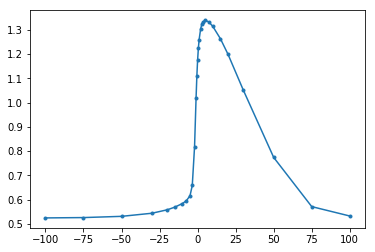

In [7]:
plot(tdels,data[:,4],'.-')
#plot(tdels,data[:,5],'.-')

#fill_between(tdels,data[:,4]+data[:,4+3],data[:,4]+data[:,4-3])

In [8]:
tdels[19]

5.0

In [9]:
for fk in fweights.keys():
    thks = list(fweights[fk].keys())
    break

In [10]:
def wdt(i,th1th2,corrected = False):
    a = [[fk,fweights[fk][th1th2][0][i],fweights[fk][th1th2][1][i]] for fk in fweights.keys()]
    a = array(a)
    if corrected:
        a[:,1] = a[:,1]-a[0,1]
    return(a)

In [11]:
def stdpalt(wt, dt = 0.05,gd = 300,gp=700, n = 100):
    gpgd = gp/gd
    
    wf = 0.5
    
    wd = wt[:,1]*n*dt*gd
    wp = wt[:,2]*n*dt*gp
    w = where(wp>0,wp/(wd+wp),0.5*exp(-wt[:,1]*n*dt*gd/20.0/150e3))
    w = w-w[0]
    return(w)
def stdp(wt):
    return(stdpalt(wt,gd=50,gp=500))

In [12]:
thks[1640]

(0.3500000000000002, 0.5500000000000004)

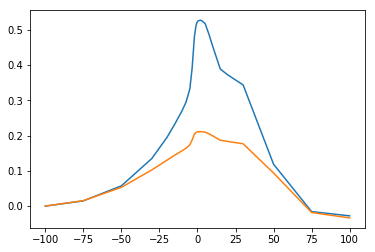

In [13]:
i = randint(500)
ths = thks[1640] #(0.35,0.55)
wt = wdt(i,ths)
rp = stdp(wt)
r = where(wt[:,1]>0,wt[:,2]/wt[:,1],0.0)
sel = ~((wt[:,2]>0)*(wt[:,1]>0))
r[sel] = -wt[sel,1]/500.0
plot(wt[:,0],(r-r[0]))
plot(wt[sel,0],(r[sel]-r[0]),'r.')

plot(wt[:,0],rp)

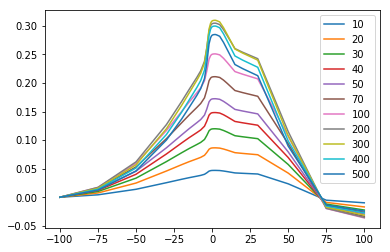

In [14]:
g0s = [10,20,30,40,50,70,100,200,300,400,500]
for g in g0s:
    plot(wt[:,0],stdpalt(wt,gd = g,gp=700),label=g)
legend()

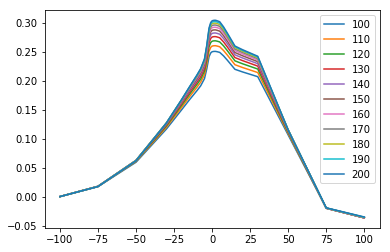

In [15]:
g1s = [100,110,120,130,140,150,160,170,180,190,200]
for g in g1s:
    plot(wt[:,0],stdpalt(wt,gd = g,gp=700),label=g)
legend()

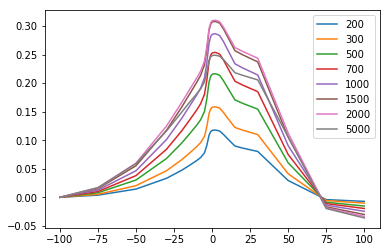

In [16]:
g2s = [200,300,500,700,1000,1500,2000,5000]
# Vary gd to see which one gives strong depression
for g in g2s:
    plot(wt[:,0],stdpalt(wt,gd = 700,gp=g),label=g)
legend()

-0.030112584150099042 0.3079211274242714 1500.0
-0.030927577022718034 0.30940623797315764 1600.0
-0.03166283775641843 0.31027732482890547 1700.0
-0.032325337283069244 0.3106286377818685 1800.0
-0.032921366389954576 0.31053927292280753 1900.0
-0.03345661097757696 0.3100759058046431 2000.0
-0.033936217953806136 0.30929497074563184 2100.0
-0.03436485305897691 0.30824441108451334 2200.0
-0.03474675171984826 0.30696509429048424 2300.0
-0.035085763866172515 0.3054919632421535 2400.0
-0.03538539350616632 0.30385497830944275 2500.0


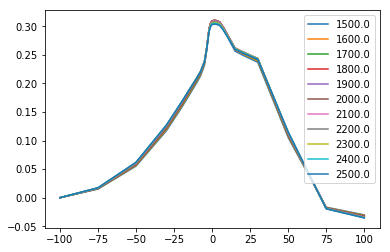

In [17]:
g3s = linspace(1500,2500,11)
# Vary gd to see which one gives strong depression
for g in g3s:
    stpdp = stdpalt(wt,gd = 700,gp=g)
    plot(wt[:,0],stpdp,label=g)
    print(stpdp.min(),stpdp.max(),g)
legend()

In [18]:
gdf,gpf = 700,1700
ths = thks[1640] #(0.35,0.55)


In [19]:
def stdp(wt):
    return(stdpalt(wt,gd=gdf,gp=gpf))

In [20]:
ths = thks[1640] #(0.3,0.5)
print(ths)

(0.3500000000000002, 0.5500000000000004)


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, 'dw')

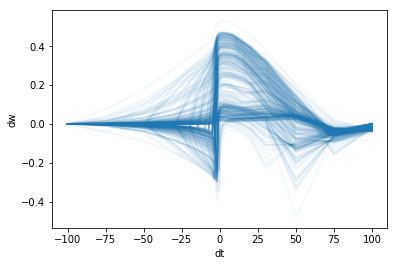

In [21]:
i = randint(500)
figure()
ths = thks[1640] #(0.35,0.55)
for i in range(500):
    wt = wdt(i,ths)
    rp = stdpalt(wt,gd = gdf, gp = gpf)
    plot(wt[:,0],rp,'C0-',alpha=0.05)
xlabel('dt')
ylabel('dw')


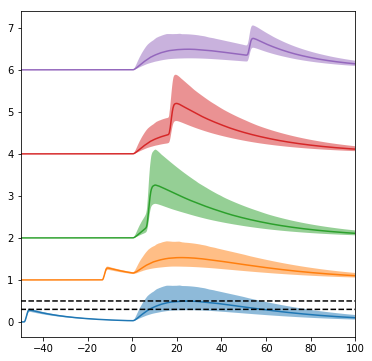

In [22]:
figure(figsize=(6,6))
tdelp = [-50,-15,5,15.0,50]
hi = [0,1,2,4.,6.,7.0]
t0 = 300
#fig,ax = subplots(nrows=7,ncols=4,figsize=(14,7*3))
for i,td in enumerate(tdelp):
    d = fcat[td]
    #ax[iy,ix].
    plot(d[:,0]-t0,d[:,1]+hi[i])
    #ax[iy,ix].plot(array(trec)-toffset-ton,ctracso[:,25],'C0-')
    #ax[iy,ix].
    fill_between(d[:,0]-t0,d[:,2]+hi[i],d[:,3]+hi[i],alpha=0.5)
xlim(250-t0,400-t0)
plot(d[:,0]-t0,d[:,0]*0+.5,'k--')
plot(d[:,0]-t0,d[:,0]*0+.3,'k--')


In [23]:
def signchanges(x):
    s0 = sign(x[1])
    i = 0
    while s0==0 and i<len(x):
        s0 = sign(x[i])
        i += 1
    if i==len(x):
        return(zeros((1,3)))
        
    sel = arange(len(x)-1)[(x[1:]*x[:-1])<0]
    res = column_stack((concatenate(([i],sel)),ones(len(sel)+1)))
    if abs(s0)>0:
        res[arange(0,res.shape[0],2),1] = s0
        res[arange(1,res.shape[0],2),1] = -s0
    else:
        print('hello?')

    return(res)
def labeld(x):
    l = ''
    for xt in x:
        if xt==-1:
            l += 'D'
        elif xt == 1:
            l +='P'
    return(l)

In [24]:

labels = [labeld(signchanges(stdp(wdt(i,ths)))[:,1]) for i in range(500)]

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [25]:
labelsn = array(labels)
labelsn[labelsn=='PD'] = 1
labelsn[labelsn=='DPD'] = 0
labelsn[labelsn=='DP'] = 2
labelsn[labelsn=='D'] = 3
labelsn[labelsn=='DPDP'] = 4

labelsn = array(labelsn,dtype=int)

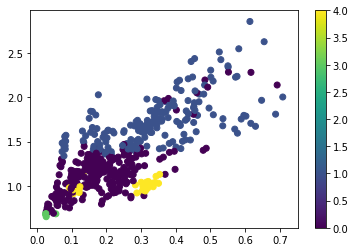

In [26]:
scatter(dis['A1'],dcs[19,:],c=labelsn)
colorbar()

In [27]:
i = 0

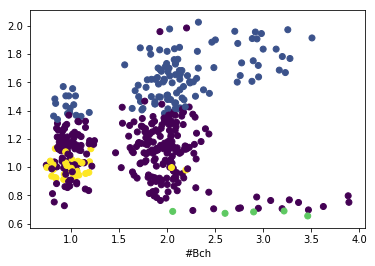

In [28]:
keys = list(dis.keys())
sel = dis['A1']<.4
scatter(dis[keys[i]][sel],dcs[19,sel],c=labelsn[sel])
xlabel(keys[i])
i +=1

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


Text(0.5, 0, 'A2')

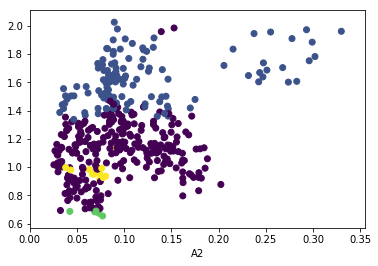

In [29]:
keys = list(dis.keys())
sel = (dis['A1']<.4)*(dis['minDhead']<180)
scatter(dis['A2'][sel],dcs[19,sel],c=labelsn[sel])
xlabel('A2')

In [30]:
ths = (0.3,0.55)
ths = (0.3,0.70)

labels = [labeld(signchanges(stdp(wdt(i,ths)))[:,1]) for i in range(500)]

labelsn = array(labels)
labelsn[labelsn=='PD'] = 1
labelsn[labelsn=='DPD'] = 0
labelsn[labelsn=='DP'] = 2
labelsn[labelsn=='DPDP'] = 3
labelsn[labelsn=='PDPD'] = 4
labelsn[labelsn=='D'] = 5

labelsn = array(labelsn,dtype=int)

scatter(dcs[0,:],dcs[19,:],c=labelsn)
colorbar()

KeyError: (0.3, 0.7)

In [31]:
gdf,gpf = 700,1700
ths = thks[1640] #(0.35,0.55)

sls = []
#dd = zeros((len(thks),3))
for k,ths in enumerate(thks):
    labels = [labeld(signchanges(stdpalt(wdt(i,ths),gd = gdf,gp = gpf))[:,1]) for i in range(500)]
    sls.append(set(labels))

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


KeyboardInterrupt: 

In [ ]:
slt = [list(sl) for sl in sls]

In [ ]:
posSTDPs = list(set(concatenate(slt)))

In [ ]:
posSTDPs

In [ ]:
gdf,gpf = 700,1700
ths = thks[1640] #(0.35,0.55)

dd = {}

for poss in posSTDPs:
    dd[poss] = zeros((len(thks),3))
    
for k,ths in enumerate(thks):
    labels = [labeld(signchanges(stdpalt(wdt(i,ths),gd = gdf,gp = gpf))[:,1]) for i in range(500)]

    labelsn = array(labels)
    for poss in posSTDPs:
        dd[poss][k,:] = concatenate((ths,[(labelsn==poss).sum()/500.0]))
    
    if k%50 == 0:
        with open("STDP_phdiagth1th2b.pickle","wb") as f:
            pickle.dump(dd,f)
    

In [ ]:
with open("STDP_phdiagth1th2b.pickle","rb") as f:
    dd = pickle.load(f)
#with open("STDP_phdiagth1th2b.pickle","wb") as f:
#    pickle.dump(dd,f)

In [ ]:
x,y,z = dd['DPD'][:,0],dd['DPD'][:,1],dd['DPD'][:,2]
triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.,1.1,0.1), linewidths=0.5, colors='k')
clabel(TR, inline=1, fontsize=10)

tricontourf(x, y, z, arange(-0.1,1.1,0.05))
xlabel('$\\theta_1$')
ylabel('$\\theta_2$')
cb = colorbar()
clim(0,1)
cb.set_label('fraction of spines with DPD')
#savefig('probDPcurve.png',dpi = 300)

In [ ]:
x,y,z = dd['DP'][:,0],dd['DP'][:,1],dd['DP'][:,2]
triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.,1.1,0.1), linewidths=0.5, colors='k')
clabel(TR, inline=1, fontsize=10)

tricontourf(x, y, z, arange(-0.1,1.1,0.05))
xlabel('$\\theta_1$')
ylabel('$\\theta_2$')
cb = colorbar()
clim(0,1)
cb.set_label('fraction of spines with DP')
#savefig('probDPcurve.png',dpi = 300)
figure()
x,y,z = dd['PD'][:,0],dd['PD'][:,1],dd['PD'][:,2]
triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.,1.1,0.1), linewidths=0.5, colors='k')
clabel(TR, inline=1, fontsize=10)

tricontourf(x, y, z, arange(-0.1,1.1,0.05))
xlabel('$\\theta_1$')
ylabel('$\\theta_2$')
cb = colorbar()
clim(0,1)
cb.set_label('fraction of spines with PD')
#savefig('probDPcurve.png',dpi = 300)

In [ ]:
x,y,z = dd[:,0],dd[:,1],dd[:,2]
triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.,1.1,0.1), linewidths=0.5, colors='k')
clabel(TR, inline=1, fontsize=10)

tricontourf(x, y, z, arange(-0.1,1.1,0.05))
xlabel('$\\theta_1$')
ylabel('$\\theta_2$')
cb = colorbar()
clim(0,1)
cb.set_label('fraction of spines with DPD')
savefig('probDPcurve.png',dpi = 300)

In [ ]:
cm = get_cmap('cool')

In [ ]:
x = dis['Vh']
x = (x-x.min())/(x.max()-x.min())

In [ ]:
figure()
ths = thks[1640] #(0.35,0.55)
for i in range(500):
    wt = wdt(i,ths)
    rp = stdp(wt)
    plot(wt[:,0],rp,c=cm(x[i]),alpha=0.1)
xlabel('dt')
ylabel('dw')
scatter(x*0,x*0-3,c = dis['Vh'],cmap=cm)
colorbar()
ylim(-.5,.5)


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


(-0.5, 0.5)

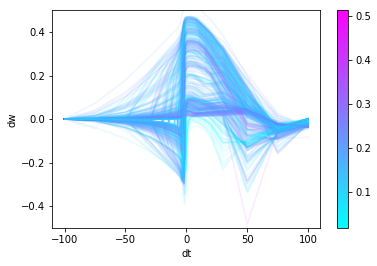

In [1003]:
figure()
ths = thks[1640] #(0.35,0.55)
for i in range(500):
    wt = wdt(i,ths)
    rp = stdp(wt)
    plot(wt[:,0],rp,c=cm(x[i]),alpha=0.1)
xlabel('dt')
ylabel('dw')
scatter(x*0,x*0-3,c = dis['Vh'],cmap=cm)
colorbar()
ylim(-.5,.5)


In [1004]:
thks[1640]

(0.3500000000000002, 0.5500000000000004)

In [205]:
with open("STDP_inhibition_exagerado.pickle","rb") as f:
    fweights,fweightsdel,data,dcs,dis = pickle.load(f)

In [190]:
with open("STDP_inhibition.pickle","rb") as f:
    fweights,fweightsdel,data,dcs,dis = pickle.load(f)

In [206]:
for fk in fweights.keys():
    thki = list(fweights[fk].keys())
    break

In [207]:
ths = thki[54]
print(ths)

(0.35, 0.55)


In [208]:
def wdti(i,th1th2,tinh = 0.0,corrected = False):
    a = [[fk,fweightsdel[(fk,tinh)][th1th2][0][i],fweightsdel[(fk,tinh)][th1th2][1][i]] for fk in fweights.keys()]
    a = array(a)
    if corrected:
        a[:,1] = a[:,1]-a[0,1]
    return(a)

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


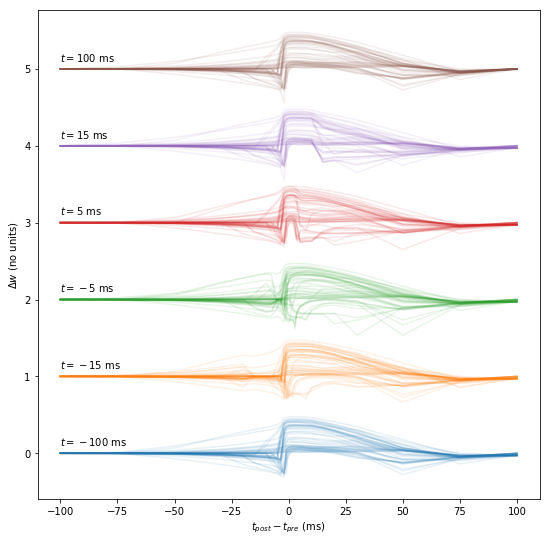

In [209]:
#fweightsdel[(tdels[0],tdels[4])][(th1,th2)]
figure(figsize=(9,9))
ths = thki[54]
labels = [labeld(signchanges(stdp(wdt(i,ths)))[:,1]) for i in range(500)]
labelsn = array(labels)
sel = labelsn=='DPD'
sel = permutation(500)
n0 = 50
for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = -100.0)
    rp = stdp(wt)
    plot(wt[:,0],rp,c='C0',alpha=0.1,label='-100')
        
for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = -15.0)
    rp = stdp(wt)
    plot(wt[:,0],rp+1,c='C1',alpha=0.1,label='-15')


for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = -5.0)
    rp = stdp(wt)
    plot(wt[:,0],rp+2,c='C2',alpha=0.1,label='-5')
        

for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = 5.0)
    rp = stdp(wt)
    plot(wt[:,0],rp+3,c='C3',alpha=0.1,label='5')
        

for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = 15.0)
    rp = stdp(wt)
    plot(wt[:,0],rp+4,c='C4',alpha=0.1,label='15')
        

for i in arange(500)[sel][:n0]:
    wt = wdti(i,ths,tinh = 100.0)
    rp = stdp(wt)
    plot(wt[:,0],rp+5,c='C5',alpha=0.1,label='100')
        
xlabel('$t_{post}-t_{pre}$ (ms)')
ylabel('$\Delta w$ (no units)')
annotate('$t=-100 $ ms', xy=(-100,0.1))
annotate('$t=-15 $ ms', xy=(-100,1.1))
annotate('$t=-5 $ ms', xy=(-100,2.1))
annotate('$t=5 $ ms', xy=(-100,3.1))
annotate('$t=15 $ ms', xy=(-100,4.1))
annotate('$t=100 $ ms', xy=(-100,5.1))

savefig('STDPsdt.png',dpi = 300)

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


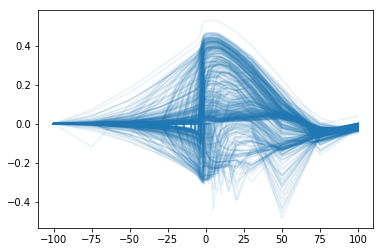

In [211]:
i =arange(500)[sel][randint(100)]
#ths = (0.25,0.5)

for i in range(500):
    wt = wdti(i,ths,tinh = 0.0)
    rp = stdp(wt)
    plot(wt[:,0],rp,'C0',alpha=0.1)

Text(0, 0.5, '$\\Delta w$')

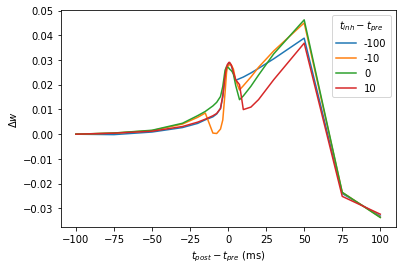

In [239]:
#i = 357
i = randint(500)
#ths = (0.25,0.5)
wt = wdti(i,ths,tinh = -100.0)
#for g in [50,70,100,150,200,300,500,1000,1500]:
rp = stdp(wt)
plot(wt[:,0],rp,label='-100')


wt = wdti(i,ths,tinh = -10.0)
#for g in [50,70,100,150,200,300,500,1000,1500]:
rp = stdp(wt)
plot(wt[:,0],rp,label='-10')

wt = wdti(i,ths,tinh = 0.0)
#for g in [50,70,100,150,200,300,500,1000,1500]:
rp = stdp(wt)
plot(wt[:,0],rp,label='0')

wt = wdti(i,ths,tinh = 10.0)
#for g in [50,70,100,150,200,300,500,1000,1500]:
rp = stdp(wt)
plot(wt[:,0],rp,label='10')
legend(title='$t_{inh}-t_{pre}$')
xlabel('$t_{post}-t_{pre}$ (ms)')
ylabel('$\Delta w$')
#savefig('STDPex357.png',dpi = 300)

In [197]:
i

9

In [198]:
from scipy.integrate import simps

In [199]:
def charges(xp,rp):
    sel0 = xp.argsort()
    xp = xp[sel0]
    rp = rp[sel0]
    sel = xp<0
    ch0 = simps(rp[sel],xp[sel])
    sel = ~sel
    ch1 = simps(rp[sel],xp[sel])
    return(ch0,ch1)

def getint(x):
    xc = x*1.0
    xc.sort()
    sh = xc.shape[0]
    xmed = xc[sh//2]
    s0= int(sh*(1-.6827)/2)
    s1 = sh-s0
    x0 = xc[s0]
    x1 = xc[s1]
    s0b= int(sh*(1-.95)/2)
    s1b = sh-s0b
    x0b = xc[s0b]
    x1b = xc[s1b]
    return((xmed,x0,x1,x0b,x1b))

In [200]:
tdelI = [-100,-75,-50,-30,-20,-15,-10,-7.5,-5,-3.5,-2,-1,-0.5,0,0.5,1.0,2.0,2.75,3.5,5.0,7.5,10.0,15.0,20.,30.,50,75,100]

chl0 = zeros((500,len(tdelI)))
chg0 = zeros((500,len(tdelI)))

for j,tinh in enumerate(tdelI):
    for i in arange(500):
        wt = wdti(i,ths,tinh = tinh)
        rp = stdp(wt)
        chs = charges(wt[:,0],rp)
        chl0[i,j] = chs[0]
        chg0[i,j] = chs[1]

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


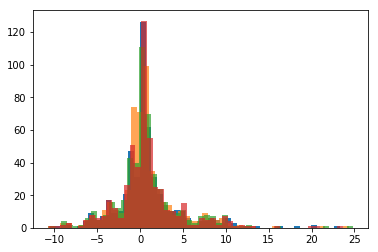

In [201]:
#Negative part
h = hist(chl0[:,0],51,label='-100')
h = hist(chl0[:,8],51,label='-5',alpha=0.7)
h = hist(chl0[:,13],51,label='0',alpha=0.7)
h = hist(chl0[:,19],51,label='5',alpha=0.7)
#hist(chg0[:,0],51)

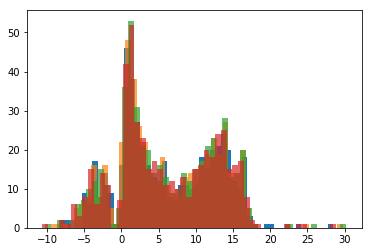

In [202]:

h = hist(chg0[:,0],51,label='-100')
h = hist(chg0[:,8],51,label='-5',alpha=0.7)
h = hist(chg0[:,13],51,label='0',alpha=0.7)
h = hist(chg0[:,19],51,label='5',alpha=0.7)

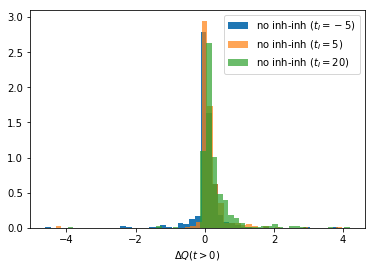

In [203]:
h = hist(chg0[:,0]-chg0[:,8],51,label='no inh-inh ($t_I=-5$)',density=True)
h = hist(chg0[:,0]-chg0[:,19],51,label='no inh-inh ($t_I=5$)',alpha=0.7,density=True)
h = hist(chg0[:,0]-chg0[:,23],51,label='no inh-inh ($t_I=20$)',alpha=0.7,density=True)
xlabel('$\Delta Q (t>0)$')
legend()
savefig('dist_Qtg0wInh10x.png')

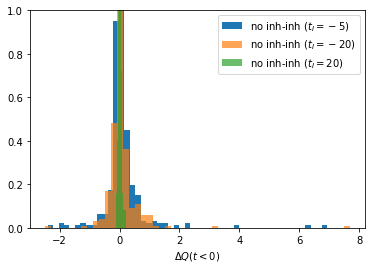

In [204]:
h = hist(chl0[:,-1]-chl0[:,8],51,label='no inh-inh ($t_I=-5$)',density=True)
h = hist(chl0[:,-1]-chl0[:,4],51,label='no inh-inh ($t_I=-20$)',alpha=0.7,density=True)
h = hist(chl0[:,0]-chl0[:,23],50,label='no inh-inh ($t_I=20$)',alpha=0.7,density=True)
xlabel('$\Delta Q (t<0)$')
ylim(0,1.0)
legend()
savefig('dist_Qtl0wInh10x.png')

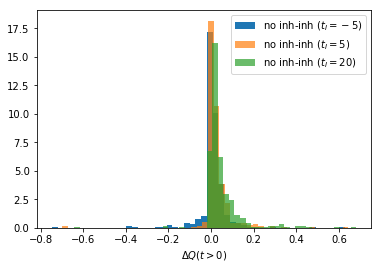

In [172]:
#sel = chg0[:,0]>5
sel = chg0[:,0]>-100
wd = chg0[sel,0].mean()
h = hist((chg0[sel,0]-chg0[sel,8])/wd,51,label='no inh-inh ($t_I=-5$)',density=True)
h = hist((chg0[sel,0]-chg0[sel,19])/wd,51,label='no inh-inh ($t_I=5$)',alpha=0.7,density=True)
h = hist((chg0[sel,0]-chg0[sel,23])/wd,51,label='no inh-inh ($t_I=20$)',alpha=0.7,density=True)
xlabel('$\Delta Q (t>0)$')
legend()

In [174]:
arange(chg0.shape[0])[(chg0[sel,0]-chg0[sel,23])/wd>0.6]

array([380, 400])

In [112]:
tdelI[5]

-15

In [85]:
with open("STDP_inhibition_b.pickle","rb") as f:
    fweights,fweightsdel,data,dcs,dis = pickle.load(f)

for fk in fweights.keys():
    thki = list(fweights[fk].keys())
    break

ths = thki[54]
print(ths)

(0.35, 0.55)


In [87]:
fweightsdel.keys()

dict_keys([(-100, 0.0), (-75, 0.0), (-50, 0.0), (-30, 0.0), (-20, 0.0), (-15, 0.0), (-10, 0.0), (-7.5, 0.0), (-5, 0.0), (-3.5, 0.0), (-2, 0.0), (-1, 0.0), (-0.5, 0.0), (0, 0.0), (0.5, 0.0), (1.0, 0.0), (2.0, 0.0), (2.75, 0.0), (3.5, 0.0), (5.0, 0.0), (7.5, 0.0), (10.0, 0.0), (15.0, 0.0), (20.0, 0.0), (30.0, 0.0), (50, 0.0), (75, 0.0), (100, 0.0)])

In [86]:
tdelI = [-100,-75,-50,-30,-20,-15,-10,-7.5,-5,-3.5,-2,-1,-0.5,0,0.5,1.0,2.0,2.75,3.5,5.0,7.5,10.0,15.0,20.,30.,50,75,100]

chl0 = zeros((500,len(tdelI)))
chg0 = zeros((500,len(tdelI)))

for j,tinh in enumerate(tdelI):
    for i in arange(500):
        wt = wdti(i,ths,tinh = tinh)
        rp = stdp(wt)
        chs = charges(wt[:,0],rp)
        chl0[i,j] = chs[0]
        chg0[i,j] = chs[1]

KeyError: (-100, -100)